# GWP - Submission 3

# 1. Data Importing and Selection

In [84]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from mpl_toolkits import mplot3d
import seaborn as sns
import pylab as py
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.preprocessing import StandardScaler
import random
import tensorflow.compat.v1 as tf
import numpy as np
import IPython.display
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM,Dense

#### 1.1 From the previous assignment, re-import the data from the csv file

In [10]:
#dframe = pd.read_csv('MScFE 650 MLF GWP Data.csv',index_col ="Date")
dframe = pd.read_csv('MScFE 650 MLF GWP Data.csv')
dframe.head()

,Date,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,1-Jan-16,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
1,8-Jan-16,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
2,15-Jan-16,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
3,22-Jan-16,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
4,29-Jan-16,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88


#### 1.2 Choose one of the 35 variables to serve as your response variable (e.g. LUXXX).  Choose the same one that your group used in the previous assignment

In [11]:
y = dframe['LUXXX']

# 2. Measuring Skewness

#### 2.1 Calculate the skewness of each return series

In [12]:
dframe.skew()

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LUXXX                    -0.748022
MSCI ARGENTINA            0.276295
BLP ORIENTE MEDIO        -0.600944
MSCI AUSTRALIA            0.172421
MSCI AUSTRIA             -0.157180
MSCI BELGIUM             -1.096933
MSCI BRAZIL              -0.552434
MSCI CANADA              -0.840165
MSCI CHINA               -0.211234
MSCI DENMARK              1.377058
MSCI EM ASIA             -0.321214
MSCI EM EU-MIDE-AFRICA   -0.273787
MSCI EM EUROPE           -0.104967
MSCI EM LATIN AMERICA    -0.754882
MSCI FINLAND             -0.652834
MSCI FRANCE              -0.228204
MSCI GERMANY             -0.512120
MSCI HONG KONG           -0.335210
MSCI INDIA               -0.425588
MSCI ITALY               -0.193540
MSCI JAPAN               -0.440382
MSCI KOREA               -0.196455
MSCI MEXICO              -0.870290
MSCI NETHERLANDS         -0.059940
MSCI NEW ZEALAND          0.969189
MSCI NORWAY              -0.382707
MSCI PERU                -0.407554
MSCI RUSSIA               0.161888
MSCI SINGAPORE      

#### 2.2 Calculate the difference between the mean and the median for each series 

In [13]:
dframe.mean() - dframe.median()

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LUXXX                     -33.849095
MSCI ARGENTINA            -15.322738
BLP ORIENTE MEDIO         -83.931072
MSCI AUSTRALIA              6.565159
MSCI AUSTRIA               -3.216111
MSCI BELGIUM               -3.724762
MSCI BRAZIL               -46.970833
MSCI CANADA               -19.808373
MSCI CHINA                 -1.921786
MSCI DENMARK              219.852738
MSCI EM ASIA               -7.896944
MSCI EM EU-MIDE-AFRICA     -4.086091
MSCI EM EUROPE             -2.345357
MSCI EM LATIN AMERICA     -96.492262
MSCI FINLAND               -2.194722
MSCI FRANCE                -2.164524
MSCI GERMANY               -1.122103
MSCI HONG KONG           -125.678849
MSCI INDIA                -43.322024
MSCI ITALY                 -0.160873
MSCI JAPAN                 -9.907857
MSCI KOREA                 -2.258095
MSCI MEXICO               -73.685000
MSCI NETHERLANDS           -1.686825
MSCI NEW ZEALAND           10.054444
MSCI NORWAY               -74.667817
MSCI PERU                 -94.627183
M

In [14]:
pd.concat([(dframe.mean() - dframe.median()), dframe.skew()], axis=1)

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,0,1
LUXXX,-33.849095,-0.748022
MSCI ARGENTINA,-15.322738,0.276295
BLP ORIENTE MEDIO,-83.931072,-0.600944
MSCI AUSTRALIA,6.565159,0.172421
MSCI AUSTRIA,-3.216111,-0.157180
MSCI BELGIUM,-3.724762,-1.096933
MSCI BRAZIL,-46.970833,-0.552434
MSCI CANADA,-19.808373,-0.840165
MSCI CHINA,-1.921786,-0.211234
MSCI DENMARK,219.852738,1.377058


#### 2.3 How do the skewness and the (mean-median) difference compare?

We observed that the signs(positive and negative) are the same. Also, they are in decimals. 

# 3. Structural Breaks and Kurtosis

#### 3.1 Calculate the kurtosis for your response return series

In [15]:
dframe.kurt()

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LUXXX                    -0.346826
MSCI ARGENTINA           -0.749353
BLP ORIENTE MEDIO        -0.552195
MSCI AUSTRALIA           -0.213729
MSCI AUSTRIA             -1.079038
MSCI BELGIUM              0.281762
MSCI BRAZIL              -0.389455
MSCI CANADA               0.549749
MSCI CHINA               -0.796897
MSCI DENMARK              1.784841
MSCI EM ASIA             -0.701812
MSCI EM EU-MIDE-AFRICA    0.433917
MSCI EM EUROPE           -0.411061
MSCI EM LATIN AMERICA    -0.172098
MSCI FINLAND             -0.347102
MSCI FRANCE              -0.714189
MSCI GERMANY             -0.021322
MSCI HONG KONG           -0.730340
MSCI INDIA               -0.980302
MSCI ITALY               -0.898782
MSCI JAPAN               -0.440768
MSCI KOREA               -0.965059
MSCI MEXICO               0.331357
MSCI NETHERLANDS         -0.669791
MSCI NEW ZEALAND         -0.203214
MSCI NORWAY              -1.210283
MSCI PERU                -0.902463
MSCI RUSSIA               0.345371
MSCI SINGAPORE      

#### 3.2 Run a threshold regression model to identify at least 1 regime shift.

In [16]:
markov_auto_regression = sm.tsa.MarkovRegression(
    dframe["LUXXX"], k_regimes=2
)
reg = markov_auto_regression.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  LUXXX   No. Observations:                  252
Model:               MarkovRegression   Log Likelihood               -1629.403
Date:                Mon, 18 Oct 2021   AIC                           3268.806
Time:                        23:37:26   BIC                           3286.454
Sample:                             0   HQIC                          3275.907
                                - 252                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        998.6616     27.422     36.418      0.000     944.916    1052.408
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1530.6454     10.431    146.734      0.000    1510.200    1551.091
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.303e+04   2058.061     11.189      0.000     1.9e+04    2.71e+04
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9911      0.014     72.547      0.000       0.964       1.018
p[1->0]        0.0034      0.004      0.903      0.367      -0.004       0.011
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [17]:
print(reg.expected_durations)
print(reg.regime_transition)

[112.00148862 290.01106018]
[[[0.99107155]
  [0.00344814]]

 [[0.00892845]
  [0.99655186]]]


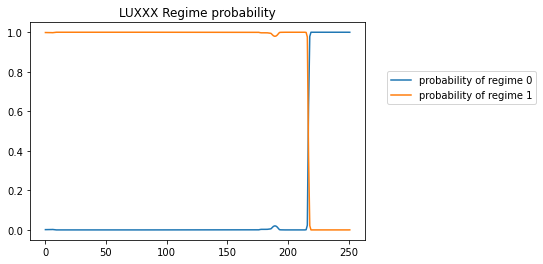

In [18]:
plt.plot(reg.smoothed_marginal_probabilities[0], label="probability of regime 0")
plt.plot(reg.smoothed_marginal_probabilities[1], label="probability of regime 1")
plt.title("LUXXX Regime probability")
plt.legend(bbox_to_anchor=(1.05, 0.6, 0.3, 0.2), loc='center left')
plt.show()

#### 3.3 Calculate the standard deviation of the return series for each regime.

In [19]:
expected_regime =  (reg.smoothed_marginal_probabilities[1] > reg.smoothed_marginal_probabilities[0]).astype(int)
expected_regime = expected_regime[1:]
expected_regime.name = "regime"
returns = dframe["LUXXX"].pct_change()[1:]
returns.name = "returns"
returns_data = pd.DataFrame([expected_regime, returns]).T

print("regime std")
print(returns_data.groupby(['regime'])['returns'].std())

regime std
regime
0.0    0.055273
1.0    0.028661
Name: returns, dtype: float64


#### 3.4 Fit a Bivariate Normal Distribution BN(mean1, standard deviation1, mean2, standard deviation2, mixing parameter). For simplicity, you can assume the means are the same

In [20]:
# means = [df["LUXXX"].mean(), df["MSCI BRAZIL"].mean()]

joined_data = pd.DataFrame([dframe["LUXXX"], dframe["MSCI BRAZIL"]]).T

joined_data.cov()
joined_data.mean()
var = multivariate_normal(mean=joined_data.mean(), cov=joined_data.cov())

var

Text(0.5, 0, 'pdf')

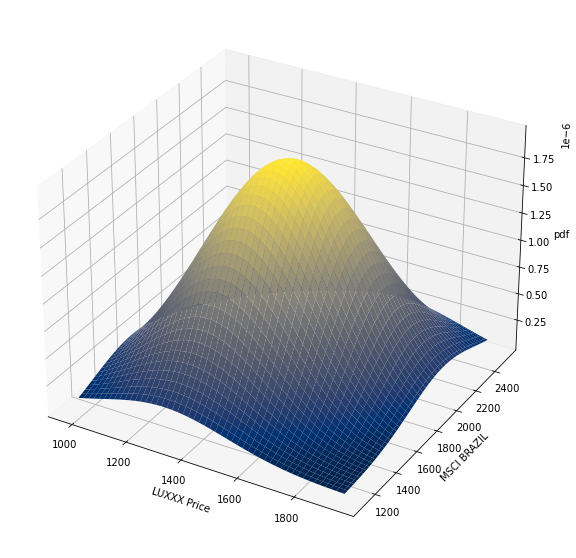

In [21]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

mean_0 = joined_data.mean()["LUXXX"]
std_0 = np.sqrt(joined_data.cov()["LUXXX"]["LUXXX"])
mean_1 = joined_data.mean()["MSCI BRAZIL"]
std_1 = np.sqrt(joined_data.cov()["MSCI BRAZIL"]["MSCI BRAZIL"])


x = np.linspace(mean_0-2*std_0, mean_0+2*std_0, 100)
y = np.linspace(mean_1-2*std_1, mean_1+2*std_1, 100)

X, Y = np.meshgrid(x, y)
Z = []
for x_cur in x:
  for y_cur in y:
    cur_var = var.pdf([x_cur, y_cur])
    Z.append(cur_var)

Z = np.array(Z)
Z.resize(len(x), len(y))
Z
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
ax.set_xlabel('LUXXX Price')
ax.set_ylabel('MSCI BRAZIL')
ax.set_zlabel('pdf')

# 4. Visualizing Distributions

4.1 Use your response variable that you ran a regime shift model.  Show the following graphs in side-by-side panels.  Keep the scales of the 2 graphs the same!

#### 4.2 Plot histograms for each return series.  Superimpose a density plot on top.

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


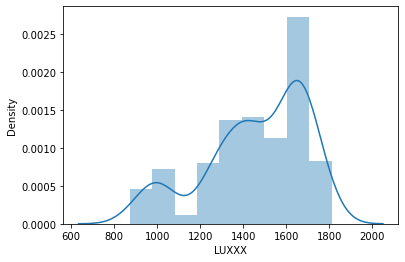

In [22]:
sns.distplot(a=dframe["LUXXX"])

plt.show()

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


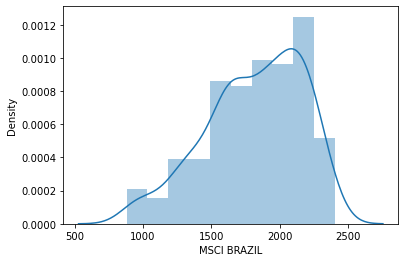

In [23]:
sns.distplot(a=dframe['MSCI BRAZIL'])

plt.show()

#### 4.3 Plot a qqplot for each return series.  Superimpose the points on the plot

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


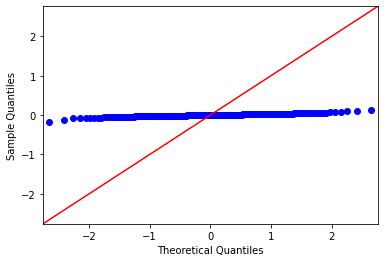

In [24]:
sm.qqplot(dframe["LUXXX"].pct_change()[1:], line ='45')
plt.show()

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


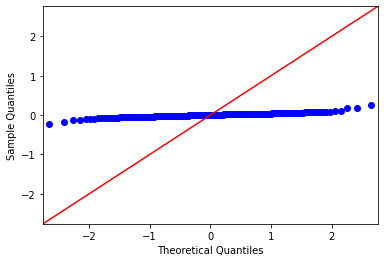

In [25]:
sm.qqplot(dframe['MSCI BRAZIL'].pct_change()[1:], line ='45')
plt.show()

#### 5.1 Using a combination of calculated stats and visuals, identify the outliers 

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


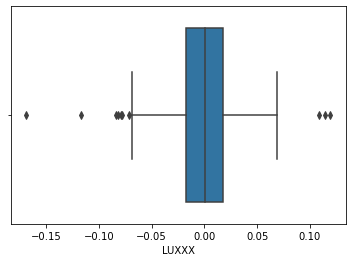

In [28]:
data_pct_change = dframe["LUXXX"].pct_change()[1:]
sns.boxplot(data_pct_change)

plt.show()

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


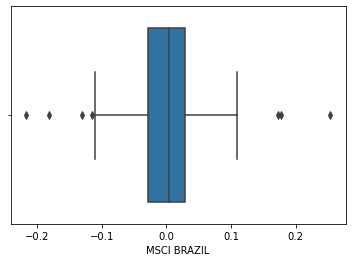

In [30]:
data_pct_change = dframe["MSCI BRAZIL"].pct_change()[1:]
sns.boxplot(data_pct_change)

plt.show()

In [31]:
data_std = data_pct_change.std()
data_mean = data_pct_change.mean()
outliers = data_pct_change[data_pct_change > data_mean + 2*data_std].append(data_pct_change[data_pct_change < data_mean - 2*data_std])
outliers

9      0.253207
223    0.171796
226    0.103185
229    0.109020
231    0.177659
45    -0.110523
72    -0.130855
217   -0.107914
219   -0.181571
220   -0.217336
225   -0.115280
Name: MSCI BRAZIL, dtype: float64

#### 5.2 What is a monotone transformation?

A monotonic transformation is a method of changing one set of numbers into another while maintaining the order of the numbers.

#### 5.3 Is there a monotone transformation of the data that can help handle the outliers better?  If so, perform it.

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


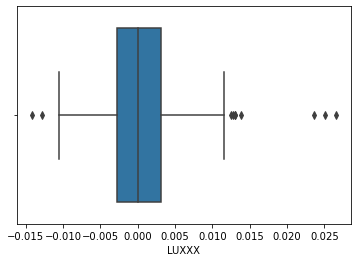

In [33]:
min_ret = -min(dframe["LUXXX"].pct_change()[1:])

transformed_data = np.square((dframe["LUXXX"].pct_change()[1:] + min_ret)) - np.square(min_ret)

min_ret = -min(transformed_data)
transformed_data = np.sqrt(transformed_data +min_ret + 1) - np.sqrt(min_ret + 1)
sns.boxplot(transformed_data)
plt.show()

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


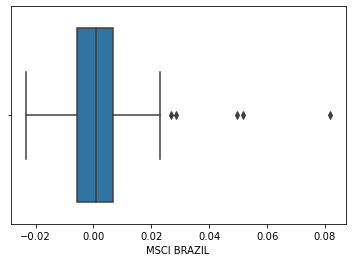

In [35]:
min_ret = -min(dframe["MSCI BRAZIL"].pct_change()[1:])

transformed_data = np.square((dframe["MSCI BRAZIL"].pct_change()[1:] + min_ret)) - np.square(min_ret)

min_ret = -min(transformed_data)
transformed_data = np.sqrt(transformed_data +min_ret + 1) - np.sqrt(min_ret + 1)
sns.boxplot(transformed_data)
plt.show()

#### 6.1 Is the neural network methodology supervised or unsupervised?  Explain.

It's supervised because you need to train the NN and then use backpropagation to make it run efficiently. They can also be used to forecast a label or a number and can directly test accuracy.

#### 7.1 Run an VARMA model, which models your response (e.g. LUXXX) versus lagged versions of itself AND with some number of exogeneous variables (e.g. the other ETFs). Use the variables you chose from your LASSO regression (see GWP#1). 

In [61]:
y = pd.DataFrame(dframe.iloc[:, 1])
x = pd.concat([pd.DataFrame(dframe.iloc[:, 2]), dframe.iloc[:, 3:]], axis=1)

In [62]:
model = Lasso(alpha=0.1)
model.fit(x, y)

tuples = []
for i,v in enumerate(model.coef_):
    tuples.append((i, v))
# 	print('Feature: %0d, Score: %.5f' % (i,v))

# choose the 7 most important predictiors by the coefficient
tuples.sort(key = lambda x: abs(x[1]), reverse=True)

topPredictors = pd.DataFrame()
for i in range(0,7):
    curSer = x.iloc[:, tuples[i][0]]
    topPredictors[curSer.name] = curSer
    
topPredictors

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142482.22375812865, tolerance: 1429.0764575389717
  positive)


,MSCI ITALY,MSCI SPAIN,MSCI GERMANY,MSCI NETHERLANDS,MSCI BELGIUM,MSCI FRANCE,MSCI AUSTRIA
0,61.26,108.40,140.65,120.08,105.38,131.10,106.70
1,56.94,101.00,129.12,112.38,99.35,122.85,97.66
2,54.86,97.34,125.17,110.37,97.32,119.45,93.54
3,54.36,99.21,128.08,114.75,100.73,123.00,95.79
4,53.16,100.06,128.32,117.19,103.05,125.61,96.93
...,...,...,...,...,...,...,...
247,48.90,78.45,140.60,163.96,64.63,137.63,84.95
248,49.52,79.97,143.29,169.19,66.00,140.51,84.89
249,50.76,82.44,147.24,173.03,69.35,144.34,90.01
250,50.23,81.31,145.91,173.88,66.90,143.76,88.66


In [63]:
# concat the x and y
def get_data(topPredictors, y):
  x_varma = pd.concat([topPredictors, y], axis=1)
  #get rid of last element
  x_varma = x_varma.iloc[:-1, :]
  # get rid of first element so we preict the future results
  y_varma = pd.concat([y.iloc[1:, :], topPredictors.iloc[1:, 0]], axis=1)
  y_varma.index = range(0,len(y_varma))

  # compute pct change for stationarity
  x_varma_pct = x_varma.pct_change()[1:]
  y_varma_pct = y_varma.pct_change()[1:]
  return x_varma_pct, y_varma_pct

x_varma_pct, y_varma_pct = get_data(topPredictors, y)


In [64]:
y_varma_pct


,LUXXX,MSCI ITALY
1,-0.026471,-0.036530
2,-0.002322,-0.009114
3,0.035141,-0.022075
4,-0.018185,-0.076561
5,-0.068617,-0.038093
...,...,...
246,-0.060663,-0.040236
247,0.049442,0.012679
248,0.037079,0.025040
249,-0.007048,-0.010441


In [65]:
varmax_model = sm.tsa.VARMAX(endog=y_varma_pct, exog=x_varma_pct, order=(2, 0, 2))
res = varmax_model.fit(maxiter=1000, disp=False)

In [66]:

model_log_likelihood = res.llf
model_log_likelihood

1085.4637251387544

In [67]:
print (res.summary())

                              Statespace Model Results                             
Dep. Variable:     ['LUXXX', 'MSCI ITALY']   No. Observations:                  250
Model:                             VARX(2)   Log Likelihood                1085.464
                               + intercept   AIC                          -2112.927
Date:                     Tue, 19 Oct 2021   BIC                          -2010.805
Time:                             00:13:59   HQIC                         -2071.826
Sample:                                  0                                         
                                     - 250                                         
Covariance Type:                       opg                                         
Ljung-Box (L1) (Q):             0.01, 0.09   Jarque-Bera (JB):        123.97, 99.77
Prob(Q):                        0.94, 0.77   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.03, 1.02   Skew:                     -0.27

#### 7.2 What is the difference between how we ran LASSO (GWP #1) and the VARMA? (Hint: think about time subscripts)

The lasso regression just considers current exogenous factors when predicting current endogenous variables, whereas the VARMA has memory and considers earlier exogenous values.

#### 7.3 Find a different set of variables that works BETTER than the original LASSO regression. Show a statistical measure to justify its improved performance.

In [50]:
iteration = 0
while True:
  tuples = []
  for i,v in enumerate(model.coef_):
      tuples.append((i, v))
  # 	print('Feature: %0d, Score: %.5f' % (i,v))

  # choose 7 features by random
  tuples.sort(key = lambda x: random.random(), reverse=True)

  topPredictors = pd.DataFrame()
  for i in range(0,7):
      curSer = x.iloc[:, tuples[i][0]]
      topPredictors[curSer.name] = curSer
      
  x_varma_pct, y_varma_pct = get_data(topPredictors, y)
  varmax_model = sm.tsa.VARMAX(endog=y_varma_pct, exog=x_varma_pct, order=(2, 0, 2))
  res = varmax_model.fit(maxiter=1000, disp=False)

  print("iteration %d" % iteration)

  if res.llf < model_log_likelihood:
    break
  iteration = iteration +1


iteration 0
iteration 1


In [51]:
res.summary()

Dep. Variable:,"['MSCI ARGENTINA', 'MSCI BRAZIL']",No. Observations:,250
Model:,VARX(2),Log Likelihood,816.695
,+ intercept,AIC,-1575.390
Date:,"Tue, 19 Oct 2021",BIC,-1473.268
Time:,00:06:21,HQIC,-1534.289
Sample:,0,,
,- 250,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.08, 0.17",Jarque-Bera (JB):,"823.04, 140.82"
Prob(Q):,"0.78, 0.68",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"4.12, 1.12",Skew:,"-1.20, 0.54"


# 8. Neural Networks

#### 8.1 Perform a Neural Network, where the response is categorical: whether your return was higher or lower than the previous week. (Ties can be ignored). Choose a suitable number of layers, basing your result on cross-validation


In [73]:
# get pct change and classifier output
y = pd.DataFrame(dframe.iloc[:, 1])
x = pd.DataFrame(dframe.iloc[:, 1:])

# get rid of last element to have the same size as the output
x_pct_change = x.pct_change()[1:-1]
y_pct_change = y.pct_change()[1:]

next_ret = y_pct_change[1:]
prev_ret = y_pct_change[:-1]
next_ret.index = range(0,len(next_ret))
prev_ret.index = range(0,len(prev_ret))

nex_ret_greater = (next_ret > prev_ret).astype(int)

nex_ret_greater = pd.concat([nex_ret_greater, (nex_ret_greater == 0).astype(int)], axis=1)
x_pct_change.index = range(0,len(x_pct_change))

In [74]:
nex_ret_greater

,LUXXX,LUXXX
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
245,0,1
246,1,0
247,0,1
248,0,1


In [75]:
# Construction
# ============
tf.reset_default_graph()
tf.compat.v1.disable_eager_execution()

# Specify the hyperparameters
n_inputs = x_pct_change.shape[1]  # Input dimension
n_hidden_1 = 30  # Hidden layer
n_outputs = 2  # Output layer
dropout_rate = 0.5  # Dropout rate

n_epochs = 3000  # Number of Epochs

with tf.name_scope("Inputs"):    
    x = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
    y = tf.placeholder(tf.float32, shape=(None, n_outputs), name="y")
    training = tf.placeholder_with_default(False, shape=(), name="training")

with tf.name_scope("output"):
    fc0    = tf.layers.dense(x, n_hidden_1, activation = tf.nn.relu, name="fc0")
    drop_0 = tf.layers.dropout(fc0, dropout_rate, training=training)
    fc1    = tf.layers.dense(drop_0, n_hidden_1, activation = tf.nn.relu, name="fc1")
    drop_1 = tf.layers.dropout(fc1, dropout_rate, training=training)
    fc2    = tf.layers.dense(drop_1, n_hidden_1, activation = tf.nn.relu, name="fc2")
    drop_2 = tf.layers.dropout(fc2, dropout_rate, training=training)
    fc3    = tf.layers.dense(drop_2, n_hidden_1, activation = tf.nn.relu, name="fc3")
    drop_3 = tf.layers.dropout(fc3, dropout_rate, training=training)
    fc4    = tf.layers.dense(drop_3, n_hidden_1, activation = tf.nn.relu, name="fc4")
    drop_4 = tf.layers.dropout(fc4, dropout_rate, training=training)
    fc5    = tf.layers.dense(drop_4, n_hidden_1, activation = tf.nn.relu, name="fc5")
    drop_5 = tf.layers.dropout(fc5, dropout_rate, training=training)

    logits = tf.layers.dense(drop_5, n_outputs, name="output")
    Y_prob = tf.nn.softmax(logits, name="Y_prob")

with tf.name_scope("train"):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y, name="xentropy")
    loss = tf.reduce_mean(xentropy, name='loss')
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.equal(tf.argmax(logits,axis=1), tf.argmax(y,axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init"):
    init_op = tf.global_variables_initializer()  

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/keras/legacy_tf_layers/core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/keras/engine/base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/keras/legacy_tf_layers/core.py:393: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  warnings.warn('`tf.layers.dropout` is deprecated and '


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [78]:
def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
  )
  return x_train_scaled, x_test_scaled

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x_pct_change.to_numpy(), nex_ret_greater.to_numpy(), test_size=0.2, shuffle=False)


x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)
with tf.Session() as sess:
    # Run the 'init' op
    sess.run(init_op)
    
    for epoch in range(n_epochs):            
        sess.run(training_op, feed_dict={x: x_train_scaled, y: y_train})
        
        #Print the training accuracy       
        if epoch % 100==0:
            acc_train = accuracy.eval(feed_dict={x: x_train_scaled, y: y_train})
            print(epoch, "Train accuracy:", acc_train)   
    
    output_probs = sess.run(Y_prob, feed_dict={x: x_test_scaled, y: y_test})
    print(accuracy.eval(feed_dict={x: x_test_scaled, y: y_test}))



0 Train accuracy: 0.555
100 Train accuracy: 1.0
200 Train accuracy: 1.0
300 Train accuracy: 1.0
400 Train accuracy: 1.0
500 Train accuracy: 1.0
600 Train accuracy: 1.0
700 Train accuracy: 1.0
800 Train accuracy: 1.0
900 Train accuracy: 1.0
1000 Train accuracy: 1.0
1100 Train accuracy: 1.0
1200 Train accuracy: 1.0
1300 Train accuracy: 1.0
1400 Train accuracy: 1.0
1500 Train accuracy: 1.0
1600 Train accuracy: 1.0
1700 Train accuracy: 1.0
1800 Train accuracy: 1.0
1900 Train accuracy: 1.0
2000 Train accuracy: 1.0
2100 Train accuracy: 1.0
2200 Train accuracy: 1.0
2300 Train accuracy: 1.0
2400 Train accuracy: 1.0
2500 Train accuracy: 1.0
2600 Train accuracy: 1.0
2700 Train accuracy: 1.0
2800 Train accuracy: 1.0
2900 Train accuracy: 1.0
0.76


In [83]:
t_true = np.argmax(y_test, axis=1)
t_predict = np.argmax(output_probs, axis=1)
# Get the confusion matrix.
confu = confusion_matrix(t_true, t_predict)
confu

array([[21,  5],
       [ 7, 17]])

8.2 Run a Regression Neural Network. The difference here is the response is continuous. This value should be the weekly return that you calculated on each series. Choose a suitable number of layers, basing your result on cross-validation


In [96]:
x_train, x_test, y_train, y_test = train_test_split(x_pct_change.to_numpy(), next_ret.to_numpy(), test_size=0.2, shuffle=False)


x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

hidden_units1 = 160
hidden_units2 = 160
hidden_units3 = 160
learning_rate = 0.01

def build_model_using_sequential():
  model = Sequential([
    LSTM(256,input_shape=(x_pct_change.shape[1],)),
    Dropout(0.2),
    LSTM(64,input_shape=(x_pct_change.shape[1],)),
    Dropout(0.2),
    LSTM(64,input_shape=(x_pct_change.shape[1],)),
    Dropout(0.2),
    LSTM(32,input_shape=(x_pct_change.shape[1],)),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

model.compile(optimizer='adam',loss='mse')
history = model.fit(x_train_scaled,y_train,epochs=300,validation_data=(x_test_scaled,y_test),shuffle=False, verbose=False)


AttributeError: 'Lasso' object has no attribute 'compile'

In [ ]:
res = model.predict(x_train_scaled.squeeze().to_numpy())

plt.plot(res, label="predicted return")
plt.plot(y_train, label="actual return")
plt.title("Training data accuracy")
plt.legend()
plt.show()


In [ ]:
t_true = (y_test > 0).astype(int)
t_predict = (res > 0).astype(int)

confu = confusion_matrix(t_true, t_predict)
confu

In [ ]:
(confu[0][0] + confu[1][1]) / (confu[0][0] + confu[1][1] + confu[1][0] + confu[0][1])

In [ ]:
sum((next_ret > 0).astype(int).squeeze()) / next_ret.shape[0]